# Библиотеки для анализа данных в Python

<img src="https://i.imgur.com/MKudW7J.png">

## Numpy

### Core python vs Numpy

Core python:
* Высокоуровневые численные типы (int, float)
* Удобные контейнеры: list с дешевой вставкой и доступом по индексу, dict с быстрым поиском по ключу

Numpy:
* Массиво-ориентированные вычисления (выполнение одних и тех же действий над всеми элементами массива)
* Эффективная реализация многомерных массивов
* Заточено для научных вычислений

### Простой пример

In [1]:
import numpy as np

C = np.array([20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1])
print(C)
print(C * 9 / 5 + 32)
print(C)

type(C)

[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]
[68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]
[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


numpy.ndarray

### Графическое представление

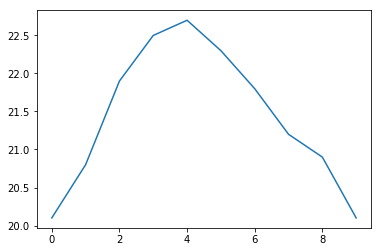

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(C)
plt.show()

### Хранение данных в обычном list

<img src="https://i.imgur.com/uddFKE8.png">

In [3]:
from sys import getsizeof as size
lst = [24, 12, 57]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)

Size without the size of the elements:  88
Size of all the elements:  84
Total size of list, including elements:  172


In [4]:
lst = [24, 12, 57, 42]
size_of_list_object = size(lst)   # only green box
size_of_elements = len(lst) * size(lst[0]) # 24, 12, 57, 42
total_list_size = size_of_list_object + size_of_elements
print("Size without the size of the elements: ", size_of_list_object)
print("Size of all the elements: ", size_of_elements)
print("Total size of list, including elements: ", total_list_size)
 
lst = []
print("Emtpy list size: ", size(lst))

Size without the size of the elements:  96
Size of all the elements:  112
Total size of list, including elements:  208
Emtpy list size:  64


### Хранение данных в numpy

<img src="https://i.imgur.com/VqTGryE.png">

In [5]:
a = np.array([24, 12, 57])
print(size(a))

e = np.array([])
print(size(e))

120
96


### Выбор типа хранимых данных

In [6]:
a = np.array([24, 12, 57], np.int8)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int16)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int32)
print(size(a) - 96)
a = np.array([24, 12, 57], np.int64)
print(size(a) - 96)

3
6
12
24


### Время работы: list vs numpy.ndarray

In [7]:
import numpy as np
from timeit import Timer
size_of_vec = 1000
X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)
def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]
def numpy_version():
    Z = X + Y
#timer_obj = Timer("x = x + 1", "x = 0")
timer_obj1 = Timer("pure_python_version()", "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", "from __main__ import numpy_version")

print(timer_obj1.repeat(repeat=3, number=10000))
print(timer_obj2.repeat(repeat=3, number=10000))

[2.223473909000063, 2.2175821050000195, 2.2138400730000285]
[0.01061354199998732, 0.01038379699991765, 0.010235724999915874]


### Создание numpy.ndarray

### arange

In [8]:
import numpy as np
a = np.arange(1, 10)
print(a)
x = range(1, 10)
print(x)    # x is an iterator
print(list(x))
# further arange examples:
x = np.arange(10.4)
print(x)
x = np.arange(0.5, 10.4, 0.8)
print(x)
x = np.arange(0.5, 10.4, 0.8, int)
print(x)

[1 2 3 4 5 6 7 8 9]
range(1, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.5  1.3  2.1  2.9  3.7  4.5  5.3  6.1  6.9  7.7  8.5  9.3 10.1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


### linspace

In [9]:
import numpy as np
# 50 values between 1 and 10:
print(np.linspace(1, 10))
# 7 values between 1 and 10:
print(np.linspace(1, 10, 7))
# excluding the endpoint:
print(np.linspace(1, 10, 7, endpoint=False))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


### Одномерный массив

In [10]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
V = np.array([3.4, 6.9, 99.8, 12.8])
print("F: ", F)
print("V: ", V)
print("Type of F: ", F.dtype)
print("Type of V: ", V.dtype)
print("Dimension of F: ", np.ndim(F))
print("Dimension of V: ", np.ndim(V))

F:  [ 1  1  2  3  5  8 13 21]
V:  [ 3.4  6.9 99.8 12.8]
Type of F:  int64
Type of V:  float64
Dimension of F:  1
Dimension of V:  1


### Многомерный массив

In [11]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A)
print(A.ndim)

B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B)
print(B.ndim)

[[ 3.4  8.7  9.9]
 [ 1.1 -7.8 -0.7]
 [ 4.1 12.3  4.8]]
2
[[[111 112]
  [121 122]]

 [[211 212]
  [221 222]]

 [[311 312]
  [321 322]]]
3


### shape

In [12]:
x = np.array([ [67, 63, 87],
               [77, 69, 59],
               [85, 87, 99],
               [79, 72, 71],
               [63, 89, 93],
               [68, 92, 78]])
print(x.shape)

x.shape = (3, 6)
print(x)

x.shape = (2, 9)
print(x)

B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B.shape)

(6, 3)
[[67 63 87 77 69 59]
 [85 87 99 79 72 71]
 [63 89 93 68 92 78]]
[[67 63 87 77 69 59 85 87 99]
 [79 72 71 63 89 93 68 92 78]]
(3, 2, 2)


### indexing

In [13]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
# print the first element of F, i.e. the element with the index 0
print(F[0])
# print the last element of F
print(F[-1])
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B[0])
print(B[0][1])
print(B[0][1][0])
# More efficient, because do not create temporary copy of intermediate arrays
print(B[0, 1])
print(B[0, 1, 0])

1
21
[[111 112]
 [121 122]]
[121 122]
121
[121 122]
121


### slicing

In [14]:
S = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(S[2:5])
print(S[:4])
print(S[6:])
print(S[:])

[2 3 4]
[0 1 2 3]
[6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
A = np.array([
[11,12,13,14,15],
[21,22,23,24,25],
[31,32,33,34,35],
[41,42,43,44,45],
[51,52,53,54,55]])
print(A[:3,2:])
print(A[3:,:])
print(A[:,4:])

[[13 14 15]
 [23 24 25]
 [33 34 35]]
[[41 42 43 44 45]
 [51 52 53 54 55]]
[[15]
 [25]
 [35]
 [45]
 [55]]


In [16]:
X = np.arange(28).reshape(4,7)
print(X)

print(X[::2, ::3])

print(X[::, ::3])

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]
[[ 0  3  6]
 [14 17 20]]
[[ 0  3  6]
 [ 7 10 13]
 [14 17 20]
 [21 24 27]]


In [17]:
# Slice of numpy.ndarray creates a view of original ndarray
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
S = A[2:6]
S[0] = 22
S[1] = 23
print(A)

# Slice of list creates a copy
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst2 = lst[2:6]
lst2[0] = 22
lst2[1] = 23
print(lst)

[ 0  1 22 23  4  5  6  7  8  9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### ones, zeros, identity

In [18]:
import numpy as np
E = np.ones((2,3))
print(E)
F = np.ones((3,4),dtype=int)
print(F)

Z = np.zeros((2,4))
print(Z)

import numpy as np
print(np.identity(4))

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Операции над numpy массивами

### Скалярные операции

In [19]:
import numpy as np
lst = [2,3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9]
v = np.array(lst)
v = v + 2
print(v)
print(v * 2.2)
print(v ** 1.5)

[ 4.    5.    9.9   5.3   8.9   2.11 12.3  14.9 ]
[ 8.8   11.    21.78  11.66  19.58   4.642 27.06  32.78 ]
[ 8.         11.18033989 31.14962279 12.2015163  26.55125232  3.06495204
 43.13776768 57.51477202]


### Время работы

In [20]:
v = np.random.randint(0, 100, 1000)
%timeit v + 1

lst = list(v)
%timeit [ val + 2 for val in lst]

1.12 µs ± 68.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
128 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Арифметические операции над массивами

In [21]:
import numpy as np
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.ones((3,3))
print("Adding to arrays: ")
print(A + B)
print("\nMultiplying two arrays: ")
print(A * (B + 1))

Adding to arrays: 
[[12. 13. 14.]
 [22. 23. 24.]
 [32. 33. 34.]]

Multiplying two arrays: 
[[22. 24. 26.]
 [42. 44. 46.]
 [62. 64. 66.]]


### Перемножение матриц

In [22]:
A = np.array([ [1, 2, 3], 
               [3, 2, 1] ])
B = np.array([ [2, 3, 4, -2], 
               [1, -1, 2, 3],
               [1, 2, 3, 0] ])
# es muss gelten:
print(A.shape[-1] == B.shape[-2], A.shape[1]) 
print(np.dot(A, B))

True 3
[[ 7  7 17  4]
 [ 9  9 19  0]]


### Broadcasting

In [23]:
import numpy as np
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([1, 2, 3])
print("Multiplication with broadcasting: ")
print(A * B)
print("... and now addition with broadcasting: ")
print(A + B)

Multiplication with broadcasting: 
[[11 24 39]
 [21 44 69]
 [31 64 99]]
... and now addition with broadcasting: 
[[12 14 16]
 [22 24 26]
 [32 34 36]]


<img src="https://i.imgur.com/Ja6Y68s.png">

In [24]:
A * B[:, np.newaxis]

array([[11, 12, 13],
       [42, 44, 46],
       [93, 96, 99]])

<img src="https://i.imgur.com/G5Zqe29.png">

### Изменения размерностей

In [25]:
import numpy as np
A = np.array([[[ 0,  1],
               [ 2,  3],
               [ 4,  5],
               [ 6,  7]],
              [[ 8,  9],
               [10, 11],
               [12, 13],
               [14, 15]],
              [[16, 17],
               [18, 19],
               [20, 21],
               [22, 23]]])
Flattened_X = A.flatten()
print(Flattened_X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [26]:
X = np.array(range(24))
Y = X.reshape((3,4,2))
Y

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [27]:
x = np.array([2,5,18,14,4])
y = x[:, np.newaxis]
print(y)

[[ 2]
 [ 5]
 [18]
 [14]
 [ 4]]


In [28]:
A = np.array([3, 4, 5])
B = np.array([1,9,0])
print(np.row_stack((A, B)))
print(np.column_stack((A, B)))
np.shape(A)

[[3 4 5]
 [1 9 0]]
[[3 1]
 [4 9]
 [5 0]]


(3,)

### Masking

In [29]:
import numpy as np
A = np.array([4, 7, 3, 4, 2, 8])
print(A == 4)

[ True False False  True False False]


In [30]:
B = np.array([[42,56,89,65],
              [99,88,42,12],
              [55,42,17,18]])
print(B>=42)

[[ True  True  True  True]
 [ True  True  True False]
 [ True  True False False]]


In [31]:
C = np.array([123,188,190,99,77,88,100])
A = np.array([4,7,2,8,6,9,5])
R = C[A<=5]
print(R)

C[[0, 2, 3, 1, 4, 1]]

[123 190 100]


array([123, 190,  99, 188,  77, 188])

## Matplotlib

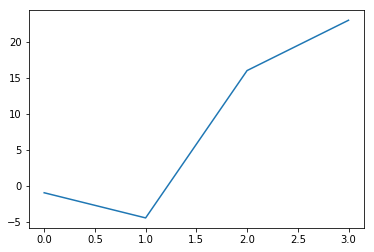

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23])
plt.show()

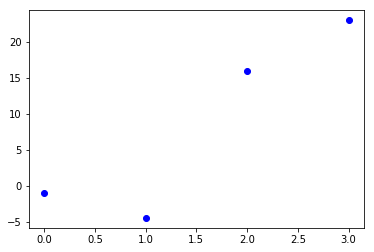

In [33]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23], "ob")
plt.show()

[0, 3, 6, 9, 12, 15, 18, 21]


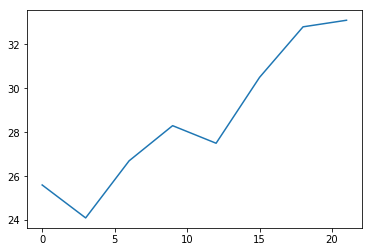

In [34]:
import matplotlib.pyplot as plt
# our X values:
days = list(range(0, 22, 3))
print(days)
# our Y values:
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values)
plt.show()

### Подписи осей

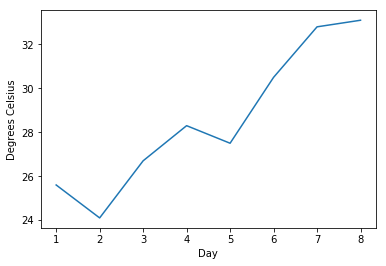

In [35]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values)
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.show()

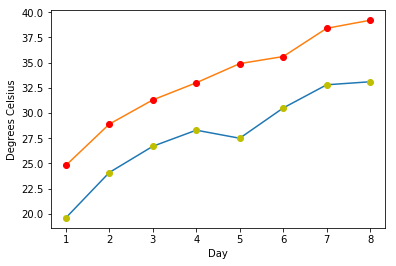

In [36]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min,
         days, celsius_min, "oy",
         days, celsius_max, 
         days, celsius_max, "or")
plt.show()

### Размерности и range на осях

The current limits for the axes are:
(0.6499999999999999, 8.35, 18.62, 40.18)
We set the axes to the following values:
0 10 14 45


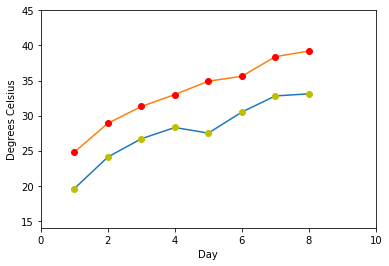

In [37]:
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min,
         days, celsius_min, "oy",
         days, celsius_max, 
         days, celsius_max, "or")
print("The current limits for the axes are:")        
print(plt.axis())
print("We set the axes to the following values:")
xmin, xmax, ymin, ymax = 0, 10, 14, 45
print(xmin, xmax, ymin, ymax)
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

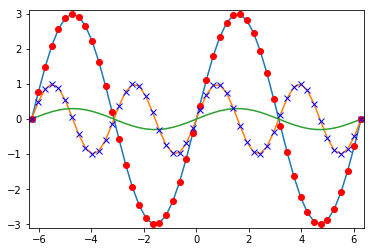

In [38]:
import matplotlib.pyplot as plt
X = np.linspace(-2 * np.pi, 2 * np.pi, 50, endpoint=True)
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
startx, endx = -2 * np.pi - 0.1, 2*np.pi + 0.1
starty, endy = -3.1, 3.1
plt.axis([startx, endx, starty, endy])
plt.plot(X,F1)
plt.plot(X,F2)
plt.plot(X,F3)
plt.plot(X, F1, 'ro')
plt.plot(X, F2, 'bx')
plt.show()

### Стиль линий

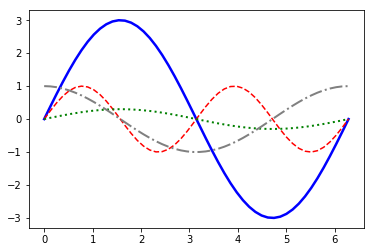

In [39]:
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
F4 = np.cos(X)
plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, F2, color="red", linewidth=1.5, linestyle="--")
plt.plot(X, F3, color="green", linewidth=2, linestyle=":")
plt.plot(X, F4, color="grey", linewidth=2, linestyle="-.")
plt.show()

### Отметки на осях (ticks)

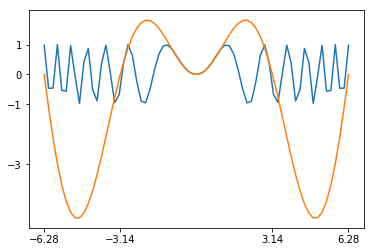

In [40]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
F1 = np.sin(X**2)
F2 = X * np.sin(X)
# get the current axes, creating them if necessary:
ax = plt.gca()
plt.xticks( [-6.28, -3.14, 3.14, 6.28])
plt.yticks([-3, -1, 0, +1, 3])
plt.plot(X, F1)
plt.plot(X, F2)
plt.show()

### Легенды

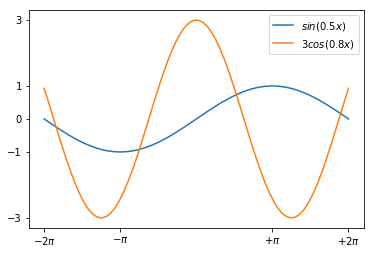

In [41]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
F1 = np.sin(0.5*X)
F2 = 3 * np.cos(0.8*X)
plt.xticks( [-6.28, -3.14, 3.14, 6.28],
        [r'$-2\pi$', r'$-\pi$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-3, -1, 0, +1, 3])
plt.plot(X, F1, label="$sin(0.5x)$")
plt.plot(X, F2, label="$3 cos(0.8x)$")
plt.legend(loc='best')
plt.show()

### Несколько фигур графиков

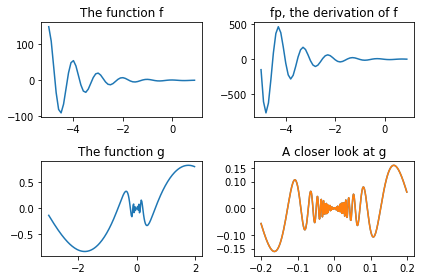

In [42]:
import numpy as np
from numpy import e, pi, sin, exp, cos
import matplotlib.pyplot as plt
def f(t):
    return exp(-t) * cos(2*pi*t)
def fp(t):
    return -2*pi * exp(-t) * sin(2*pi*t) - e**(-t)*cos(2*pi*t)
def g(t):
    return sin(t) * cos(1/(t+0.1))
def g(t):
    return sin(t) * cos(1/(t))
python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))
t = np.arange(-5.0, 1.0, 0.1)
sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('The function f') # non OOP: plt.title('The function f')
sub1.plot(t, f(t))
sub2 = fig.add_subplot(222)
sub2.set_title('fp, the derivation of f')
sub2.plot(t, fp(t))
t = np.arange(-3.0, 2.0, 0.02)
sub3 = fig.add_subplot(223)
sub3.set_title('The function g')
sub3.plot(t, g(t))
t = np.arange(-0.2, 0.2, 0.001)
sub4 = fig.add_subplot(224)
sub4.set_title('A closer look at g')
sub4.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
sub4.set_yticks([-0.15, -0.1, 0, 0.1, 0.15])
sub4.plot(t, g(t))
plt.plot(t, g(t))
plt.tight_layout()
plt.show()

## Pandas

### Series

In [43]:
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [44]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S

apples      20
oranges     33
cherries    52
pears       10
dtype: int64

In [45]:
fruits = ['peaches', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']
S = pd.Series([20, 33, 52, 10], index=fruits)

print(S['oranges'], end='\n\n')
print(S[['oranges', 'cherries']], end='\n\n')

S2 = pd.Series([17, 13, 31, 32], index=fruits2)
print(S + S2)

33

oranges     33
cherries    52
dtype: int64

cherries       83.0
oranges        46.0
peaches         NaN
pears          42.0
raspberries     NaN
dtype: float64


In [46]:
S = pd.Series([11, 28, 72, 3, 5, 8])
print((S + 3) * 4, end='\n\n')

print(S.apply(lambda x: x if x > 50 else x+10 ), end='\n\n')

print(S[S>30], end='\n\n')

0     56
1    124
2    300
3     24
4     32
5     44
dtype: int64

0    21
1    38
2    72
3    13
4    15
5    18
dtype: int64

2    72
dtype: int64



### Проверка значений на missing

In [47]:
cities = {"London":   8615246, 
          "Berlin":   3562166, 
          "Madrid":   3165235, 
          "Rome":     2874038, 
          "Paris":    2273305, 
          "Vienna":   1805681, 
          "Bucharest":1803425, 
          "Hamburg":  1760433,
          "Budapest": 1754000,
          "Warsaw":   1740119,
          "Barcelona":1602386,
          "Munich":   1493900,
          "Milan":    1350680}

my_cities = ["London", "Paris", "Zurich", "Berlin", 
             "Stuttgart", "Hamburg"]
my_city_series = pd.Series(cities, 
                           index=my_cities)
print(my_city_series, end='\n\n')

print(my_city_series.isnull(), end='\n\n')

print(my_city_series.dropna(), end='\n\n')

print(my_city_series.fillna(0), end='\n\n')

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64

London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64



### DataFrame

In [66]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}
city_frame = pd.DataFrame(cities)
city_frame

name  population  country
0      London     8615246  England
1      Berlin     3562166  Germany
2      Madrid     3165235    Spain
3        Rome     2874038    Italy
4       Paris     2273305   France
5      Vienna     1805681  Austria
6   Bucharest     1803425  Romania
7     Hamburg     1760433  Germany
8    Budapest     1754000  Hungary
9      Warsaw     1740119   Poland
10  Barcelona     1602386    Spain
11     Munich     1493900  Germany
12      Milan     1350680    Italy

In [67]:
ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]
city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

name  population  country
first          London     8615246  England
second         Berlin     3562166  Germany
third          Madrid     3165235    Spain
fourth           Rome     2874038    Italy
fifth           Paris     2273305   France
sixth          Vienna     1805681  Austria
seventh     Bucharest     1803425  Romania
eigth         Hamburg     1760433  Germany
ninth        Budapest     1754000  Hungary
tenth          Warsaw     1740119   Poland
eleventh    Barcelona     1602386    Spain
twelvth        Munich     1493900  Germany
thirteenth      Milan     1350680    Italy

In [68]:
city_frame = pd.DataFrame(cities,
                          columns=["name", "population"],
                          index=cities["country"])
city_frame

name  population
England     London     8615246
Germany     Berlin     3562166
Spain       Madrid     3165235
Italy         Rome     2874038
France       Paris     2273305
Austria     Vienna     1805681
Romania  Bucharest     1803425
Germany    Hamburg     1760433
Hungary   Budapest     1754000
Poland      Warsaw     1740119
Spain    Barcelona     1602386
Germany     Munich     1493900
Italy        Milan     1350680

### Действия над данными в DataFrame

In [69]:
print(city_frame.sum(), end='\n\n')

print(city_frame["population"].sum(), end='\n\n')

x = city_frame["population"].cumsum()
print(x)

name          LondonBerlinMadridRomeParisViennaBucharestHamb...
population                                             33800614
dtype: object

33800614

England     8615246
Germany    12177412
Spain      15342647
Italy      18216685
France     20489990
Austria    22295671
Romania    24099096
Germany    25859529
Hungary    27613529
Poland     29353648
Spain      30956034
Germany    32449934
Italy      33800614
Name: population, dtype: int64


In [70]:
city_frame["cum_population"] = city_frame["population"].cumsum()
print(city_frame)

              name  population  cum_population
England     London     8615246         8615246
Germany     Berlin     3562166        12177412
Spain       Madrid     3165235        15342647
Italy         Rome     2874038        18216685
France       Paris     2273305        20489990
Austria     Vienna     1805681        22295671
Romania  Bucharest     1803425        24099096
Germany    Hamburg     1760433        25859529
Hungary   Budapest     1754000        27613529
Poland      Warsaw     1740119        29353648
Spain    Barcelona     1602386        30956034
Germany     Munich     1493900        32449934
Italy        Milan     1350680        33800614


### Доступ к элементам

In [71]:
# in a dictionary-like way:
print(city_frame["population"])

England    8615246
Germany    3562166
Spain      3165235
Italy      2874038
France     2273305
Austria    1805681
Romania    1803425
Germany    1760433
Hungary    1754000
Poland     1740119
Spain      1602386
Germany    1493900
Italy      1350680
Name: population, dtype: int64


In [72]:
# as an attribute
print(city_frame.population)

England    8615246
Germany    3562166
Spain      3165235
Italy      2874038
France     2273305
Austria    1805681
Romania    1803425
Germany    1760433
Hungary    1754000
Poland     1740119
Spain      1602386
Germany    1493900
Italy      1350680
Name: population, dtype: int64


In [73]:
city_frame.loc["Italy"]

name  population  cum_population
Italy   Rome     2874038        18216685
Italy  Milan     1350680        33800614

### Изменение значений колонок

In [74]:
city_frame["area"] = 1572
print(city_frame)

              name  population  cum_population  area
England     London     8615246         8615246  1572
Germany     Berlin     3562166        12177412  1572
Spain       Madrid     3165235        15342647  1572
Italy         Rome     2874038        18216685  1572
France       Paris     2273305        20489990  1572
Austria     Vienna     1805681        22295671  1572
Romania  Bucharest     1803425        24099096  1572
Germany    Hamburg     1760433        25859529  1572
Hungary   Budapest     1754000        27613529  1572
Poland      Warsaw     1740119        29353648  1572
Spain    Barcelona     1602386        30956034  1572
Germany     Munich     1493900        32449934  1572
Italy        Milan     1350680        33800614  1572


In [75]:
# area in square km:
area = [1572, 891.85, 605.77, 1285, 
        105.4, 414.6, 228, 755, 
        525.2, 517, 101.9, 310.4, 
        181.8]
city_frame["area"] = area
print(city_frame)

              name  population  cum_population     area
England     London     8615246         8615246  1572.00
Germany     Berlin     3562166        12177412   891.85
Spain       Madrid     3165235        15342647   605.77
Italy         Rome     2874038        18216685  1285.00
France       Paris     2273305        20489990   105.40
Austria     Vienna     1805681        22295671   414.60
Romania  Bucharest     1803425        24099096   228.00
Germany    Hamburg     1760433        25859529   755.00
Hungary   Budapest     1754000        27613529   525.20
Poland      Warsaw     1740119        29353648   517.00
Spain    Barcelona     1602386        30956034   101.90
Germany     Munich     1493900        32449934   310.40
Italy        Milan     1350680        33800614   181.80


### Сортировка DataFrame

In [76]:
city_frame = city_frame.sort_values(by="area", ascending=False)
print(city_frame)

              name  population  cum_population     area
England     London     8615246         8615246  1572.00
Italy         Rome     2874038        18216685  1285.00
Germany     Berlin     3562166        12177412   891.85
Germany    Hamburg     1760433        25859529   755.00
Spain       Madrid     3165235        15342647   605.77
Hungary   Budapest     1754000        27613529   525.20
Poland      Warsaw     1740119        29353648   517.00
Austria     Vienna     1805681        22295671   414.60
Germany     Munich     1493900        32449934   310.40
Romania  Bucharest     1803425        24099096   228.00
Italy        Milan     1350680        33800614   181.80
France       Paris     2273305        20489990   105.40
Spain    Barcelona     1602386        30956034   101.90


### Визуализация содержимого DataFrame

           population       area
London        8615246  1572000.0
Berlin        3562166   891850.0
Madrid        3165235   605770.0
Rome          2874038  1285000.0
Paris         2273305   105400.0
Vienna        1805681   414600.0
Bucharest     1803425   228000.0
Hamburg       1760433   755000.0
Budapest      1754000   525200.0
Warsaw        1740119   517000.0
Barcelona     1602386   101900.0
Munich        1493900   310400.0
Milan         1350680   181800.0


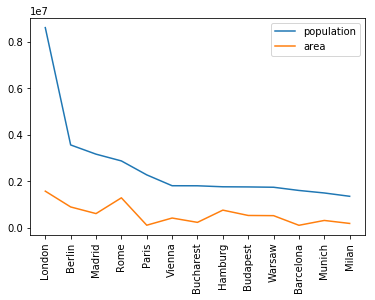

In [77]:
%matplotlib inline

import pandas as pd
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}
city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
city_frame["area"] *= 1000
print(city_frame)

city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True, 
                rot=90)